# Desafío - Pruebas de hipótesis

**Nombre:** Luis Porras

## 1. Evaluar juicios de hipótesis

In [1]:
N = 150
n1 = 75 # Hetero
n2 = 75 # Homo
p1 = 0.67 # La probabilidad de que un Hetero apruebe la adopcion homoparental es 67%
p2 = 0.72 # La probabilidad de que un Homo apruebe la adopcion homoparental es 72%

$ Ho : P1 = P2 $


$ H1 : P1 != P2 $

In [2]:
p = 11.83 # valor de prueba, Z
p_score = 2.52 # Puntaje de corte

### Pregunta: ¿qué se debe concluir?

**Respuesta:** Dado que el valor Z de `11.83` es mayor al puntaje de corte `2.52`, tenemos que existe evidencia para rechazar
la Hipótesis Nula.  Es decir que la probabilidad de que un Hetero apruebe la adopción hommoparental es distinta a la probabilidad de que un Homo apruebe la adopicón homoparental.

* Un  investigador de  la  Sociedad de  Abstemios de  Chile  sugiere que  los  hombres tienen mayores niveles de  consumo de  alcohol que  las  mujeres, siendo esta  diferencia estadísticamente significativa. Esto en base a su estudio realizado con 48 individuos, donde contrastó su puntaje de prueba a una distribución asintóticamente normal.


### Pregunta: ¿Qué se puede decir sobre su estudio?

**Respuesta:** Dado que la diferencia fue estadísticamente significativa, concluimmos que el Z calculado fue mayor al puntaje de corte, y se rechazo la hipótesis Nula que indica que las medias eran Iguales.

## 2. Importe la base de datos utilizada la sesión presencial anterior

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('nations.csv', encoding='latin-1')
df.head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


* Agrege una serie de variables binarias por cada continente de la variable `region`.

In [4]:
df['region'].value_counts()

Africa      52
Asia        49
Europe      43
Americas    35
Oceania     15
Name: region, dtype: int64

In [5]:
regions = df['region'].unique()
regions

array(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype=object)

In [24]:
tmp_df = df.copy()

In [25]:
for region in regions:
    tmp_df[f"is_from_{region}"] = np.where(tmp_df['region'] == region, 1, 0)

In [26]:
tmp_df[tmp_df['region'] == 'Africa'].head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini,is_from_Africa,is_from_Americas,is_from_Asia,is_from_Europe,is_from_Oceania
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN,1,0,0,0,0
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN,1,0,0,0,0
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN,1,0,0,0,0
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN,1,0,0,0,0
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999,1,0,0,0,0


In [27]:
tmp_df[tmp_df['region'] == 'Americas'].head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini,is_from_Africa,is_from_Americas,is_from_Asia,is_from_Europe,is_from_Oceania
52,53,Antigua and Barbuda,Americas,17676.400391,8.900000,55.500000,13.00,72.166664,86367,30.466667,NaN,99.000000,18.299999,NaN,0,1,0,0,0
53,54,Argentina,Americas,12274.000000,9.083333,56.900002,15.25,75.283333,39543736,91.900002,0.6544,97.699997,15.650000,45.799999,0,1,0,0,0
54,55,Bahamas,Americas,NaN,8.500000,31.799999,13.75,74.599998,331233,83.599998,0.8656,NaN,23.950001,NaN,0,1,0,0,0
55,56,Barbados,Americas,19189.000000,9.250000,42.599998,11.50,76.300003,271917,42.900002,0.8430,NaN,16.650000,NaN,0,1,0,0,0
56,57,Belize,Americas,6208.799805,7.850000,78.699997,19.75,75.216667,296200,51.200001,0.5674,NaN,10.750000,NaN,0,1,0,0,0


In [28]:
tmp_df[tmp_df['region'] == 'Europe'].head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini,is_from_Africa,is_from_Americas,is_from_Asia,is_from_Europe,is_from_Oceania
136,137,Albania,Europe,6832.600098,10.283333,17.9,17.0,76.400002,3174417,49.350002,0.6948,95.900002,5.150000,34.500000,0,0,0,1,0
137,138,Andorra,Europe,NaN,10.400000,8.4,4.0,80.516663,81733,89.116669,NaN,NaN,NaN,NaN,0,0,0,1,0
138,139,Austria,Europe,34838.398438,10.366667,12.8,4.5,80.183334,8320033,67.016663,0.7714,NaN,31.900002,NaN,0,0,0,1,0
139,140,Belarus,Europe,10391.799805,9.300000,22.1,13.0,69.466667,9707033,73.399994,0.8208,99.699997,25.000000,27.200001,0,0,0,1,0
140,141,Belgium,Europe,32868.800781,10.733334,14.2,5.0,79.566666,10567200,97.350006,0.7590,NaN,38.150002,NaN,0,0,0,1,0


In [29]:
tmp_df[tmp_df['region'] == 'Oceania'].head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini,is_from_Africa,is_from_Americas,is_from_Asia,is_from_Europe,is_from_Oceania
179,180,Angola,Oceania,4662.000000,4.400000,171.100006,170.00,49.666668,17783300,56.250000,0.8380,70.0,2.250000,NaN,0,0,0,0,1
180,181,Australia,Oceania,33707.199219,11.983334,16.500000,5.25,81.400002,21325382,88.666664,0.7994,NaN,66.199997,NaN,0,0,0,0,1
181,182,Fiji,Oceania,4259.600098,10.300000,45.200001,18.00,68.783333,840417,50.900002,0.4954,NaN,7.250000,NaN,0,0,0,0,1
182,183,Kiribati,Oceania,2294.199951,7.800000,22.200001,49.25,67.133331,95750,43.700001,NaN,NaN,1.050000,NaN,0,0,0,0,1
183,184,Marshall Is,Oceania,NaN,9.800000,53.500000,36.00,70.866669,52833,70.900002,NaN,NaN,5.650000,NaN,0,0,0,0,1


* De manera similar a la sesión anterior, enfóquese en las siguientes variables:
    * Apellidos desde la N hasta la Z: Enfocarse en las variables `femlab`, `literacy` y `school`.

In [40]:
tmp_2_df = tmp_df.loc[:, ['country', 'region', 'femlab', 'literacy', 'school', 'is_from_Africa', 'is_from_Americas', 'is_from_Asia', 'is_from_Europe', 'is_from_Oceania']]

In [41]:
tmp_2_df.head()

,country,region,femlab,literacy,school,is_from_Africa,is_from_Americas,is_from_Asia,is_from_Europe,is_from_Oceania
0,Algeria,Africa,0.4522,72.599998,6.716667,1,0,0,0,0
1,Benin,Africa,0.8482,41.700001,3.100000,1,0,0,0,0
2,Botswana,Africa,0.8870,84.099998,8.600000,1,0,0,0,0
3,Burkina Faso,Africa,0.8584,23.600000,1.300000,1,0,0,0,0
4,Burundi,Africa,1.0344,66.599998,2.483333,1,0,0,0,0


## 3. Implemente una función de prueba de hipótesis a mano

* La función debe ingresar los siguientes argumentos:
    * `df`: La tabla de datos.
    * `variable`: La variable a analizar
    * `binarize`: El indicador binario a utilizar.

* tips:
    * Separe la variable en dos, utilizando el indicador binario. Recuerde eliminar los perdidos con `dropna()`
    * Implemente `ttest_ind` de `scipy.stats` y guarde el valor `t` y `pval`
    * Reporte las medias para cada grupo (0 y 1)
    * Reporte la diferencia de entre las medias.
    * Reporte los valores `t` y `p`

In [45]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
def desafio_3(df, variable, binarize):
    region_variable_serie = df.query(f"is_from_{binarize} == 1")[variable].dropna()
    no_region_variable_serie = df.query(f"is_from_{binarize} == 0")[variable].dropna()
    mean_region_variable = region_variable_serie.mean()
    mean_no_region_variable = no_region_variable_serie.mean()
    print(f"La media de la region {binarize} para la variable {variable} es: {round(mean_region_variable, 2)}")
    print(f"La media de el resto de regiones para la variable {variable} es: {round(mean_no_region_variable, 2)}")
    print(f"La diferencia de las medias de {variable} para la region {binarize} y el resto del mundo es: {round(mean_region_variable - mean_no_region_variable, 2)}")

    t, p = stats.ttest_ind(region_variable_serie, no_region_variable_serie)
    print(f"El valor t es: {t}")
    print(f"El valor p es: {p}")
    
    return None



In [59]:
desafio_3(tmp_2_df, 'femlab', 'Africa')

La media de la region Africa para la variable femlab es: 0.73
La media de el resto de regiones para la variable femlab es: 0.68
La diferencia de las medias de femlab para la region Africa y el resto del mundo es: 0.05
El valor t es: 1.783872878266046
El valor p es: 0.0761771840435915


In [60]:
desafio_3(tmp_2_df, 'literacy', 'Africa')

La media de la region Africa para la variable literacy es: 65.31
La media de el resto de regiones para la variable literacy es: 90.2
La diferencia de las medias de literacy para la region Africa y el resto del mundo es: -24.89
El valor t es: -8.909991173873896
El valor p es: 3.3857112156459963e-15


In [61]:
desafio_3(tmp_2_df, 'school', 'Africa')

La media de la region Africa para la variable school es: 4.52
La media de el resto de regiones para la variable school es: 8.55
La diferencia de las medias de school para la region Africa y el resto del mundo es: -4.03
El valor t es: -10.415811831777058
El valor p es: 2.6352830456717332e-20


## 4. Implemente una función que grafique los histogramas paraambas muestras.

* Genere una función que devuelva un gráfico donde visualice las dos histogramas cuando la variable es 1 y 0, respectivamente.
    * `tips`: Refactorize la función incluyendo el método hist de `matplotlib.pyplot`. Incluya los argumentos `alpha` y `label`

* Para las tres variables de interés acorde a su grupo, analice las diferencias de medias por cada  continente, y  posteriormente grafique. Concluya con  los  principales resultados al respecto.

In [126]:
def desafio_4(df, variable, binarize):
    region_variable_serie = df.query(f"is_from_{binarize} == 1")[variable].dropna()
    no_region_variable_serie = df.query(f"is_from_{binarize} == 0")[variable].dropna()
    mean_region_variable = region_variable_serie.mean()
    mean_no_region_variable = no_region_variable_serie.mean()

    print(f"La media de la region {binarize} para la variable {variable} es: {round(mean_region_variable, 2)}")
    print(f"La media de el resto de regiones para la variable {variable} es: {round(mean_no_region_variable, 2)}")
    print(f"La diferencia de las medias de {variable} para la region {binarize} y el resto del mundo es: {round(mean_region_variable - mean_no_region_variable, 2)}")

    plt.subplot(1, 2, 1)
    plt.hist(region_variable_serie, alpha=.6, color='blue', label=f"{binarize} {variable}")
    plt.axvline(mean_region_variable, lw=3, color='lightblue', linestyle='--', label=f"Mean group 1 ({round(mean_region_variable, 4)})")
    plt.legend()

    plt.subplot(1,2,2)
    plt.hist(no_region_variable_serie, alpha=.6, color='green', label=f"NO {binarize} {variable}")
    plt.axvline(mean_no_region_variable, lw=3, color='lightgreen', linestyle='--', label=f"Mean group 0 ({round(mean_no_region_variable, 4)})")
    plt.legend()
    plt.show()
    return None

In [127]:
regions

array(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype=object)

### Histogramas para Africa:

La media de la region Africa para la variable femlab es: 0.73
La media de el resto de regiones para la variable femlab es: 0.68
La diferencia de las medias de femlab para la region Africa y el resto del mundo es: 0.05


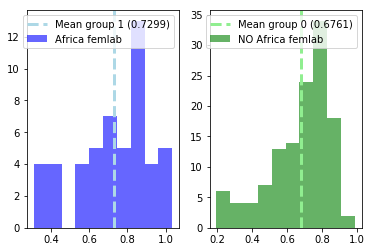

In [128]:
desafio_4(tmp_2_df, 'femlab', 'Africa')

La media de la region Africa para la variable literacy es: 65.31
La media de el resto de regiones para la variable literacy es: 90.2
La diferencia de las medias de literacy para la region Africa y el resto del mundo es: -24.89


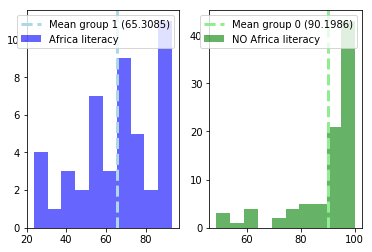

In [129]:
desafio_4(tmp_2_df, 'literacy', 'Africa')

La media de la region Africa para la variable school es: 4.52
La media de el resto de regiones para la variable school es: 8.55
La diferencia de las medias de school para la region Africa y el resto del mundo es: -4.03


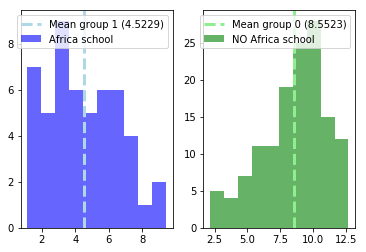

In [130]:
desafio_4(tmp_2_df, 'school', 'Africa')

### Histogramas para Americas:

La media de la region Americas para la variable femlab es: 0.65
La media de el resto de regiones para la variable femlab es: 0.7
La diferencia de las medias de femlab para la region Americas y el resto del mundo es: -0.05


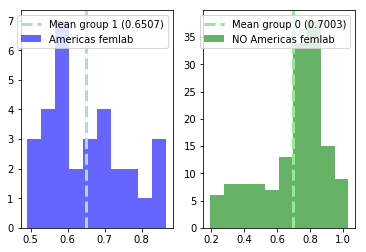

In [131]:
desafio_4(tmp_2_df, 'femlab', 'Americas')

La media de la region Americas para la variable literacy es: 89.3
La media de el resto de regiones para la variable literacy es: 80.18
La diferencia de las medias de literacy para la region Americas y el resto del mundo es: 9.12


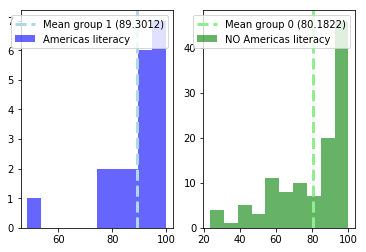

In [132]:
desafio_4(tmp_2_df, 'literacy', 'Americas')

La media de la region Americas para la variable school es: 8.07
La media de el resto de regiones para la variable school es: 7.32
La diferencia de las medias de school para la region Americas y el resto del mundo es: 0.75


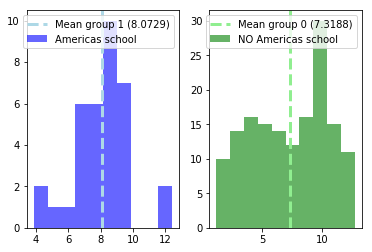

In [133]:
desafio_4(tmp_2_df, 'school', 'Americas')

### Histogramas para Asia:

La media de la region Asia para la variable femlab es: 0.61
La media de el resto de regiones para la variable femlab es: 0.72
La diferencia de las medias de femlab para la region Asia y el resto del mundo es: -0.11


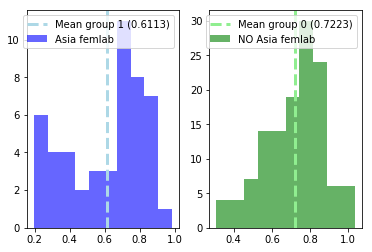

In [134]:
desafio_4(tmp_2_df, 'femlab', 'Asia')

La media de la region Asia para la variable literacy es: 87.36
La media de el resto de regiones para la variable literacy es: 78.99
La diferencia de las medias de literacy para la region Asia y el resto del mundo es: 8.36


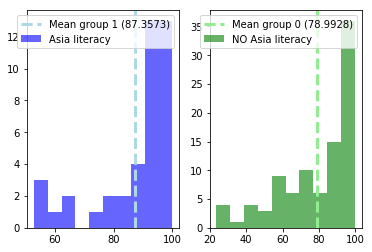

In [135]:
desafio_4(tmp_2_df, 'literacy', 'Asia')

La media de la region Asia para la variable school es: 7.26
La media de el resto de regiones para la variable school es: 7.53
La diferencia de las medias de school para la region Asia y el resto del mundo es: -0.27


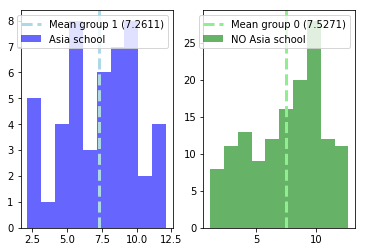

In [136]:
desafio_4(tmp_2_df, 'school', 'Asia')

### Histogramas para Europe:

La media de la region Europe para la variable femlab es: 0.77
La media de el resto de regiones para la variable femlab es: 0.67
La diferencia de las medias de femlab para la region Europe y el resto del mundo es: 0.1


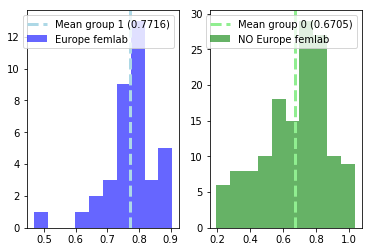

In [137]:
desafio_4(tmp_2_df, 'femlab', 'Europe')

La media de la region Europe para la variable literacy es: 98.18
La media de el resto de regiones para la variable literacy es: 78.29
La diferencia de las medias de literacy para la region Europe y el resto del mundo es: 19.88


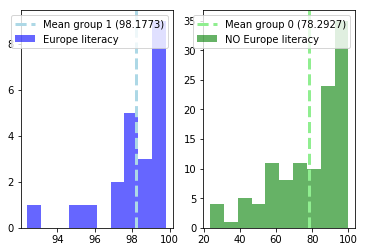

In [138]:
desafio_4(tmp_2_df, 'literacy', 'Europe')

La media de la region Europe para la variable school es: 10.42
La media de el resto de regiones para la variable school es: 6.63
La diferencia de las medias de school para la region Europe y el resto del mundo es: 3.79


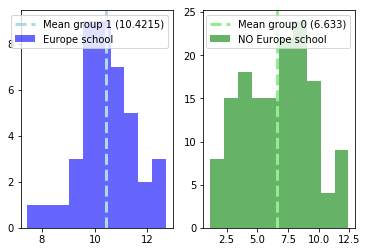

In [139]:
desafio_4(tmp_2_df, 'school', 'Europe')

### Histogramas para Oceania:

La media de la region Oceania para la variable femlab es: 0.72
La media de el resto de regiones para la variable femlab es: 0.69
La diferencia de las medias de femlab para la region Oceania y el resto del mundo es: 0.03


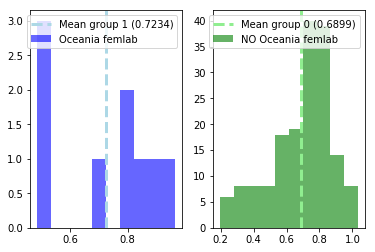

In [140]:
desafio_4(tmp_2_df, 'femlab', 'Oceania')

La media de la region Oceania para la variable literacy es: 81.98
La media de el resto de regiones para la variable literacy es: 81.52
La diferencia de las medias de literacy para la region Oceania y el resto del mundo es: 0.46


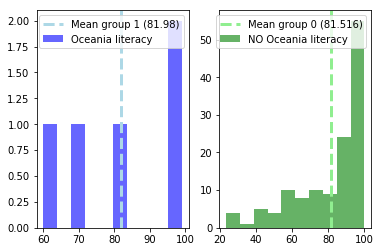

In [141]:
desafio_4(tmp_2_df, 'literacy', 'Oceania')

La media de la region Oceania para la variable school es: 8.72
La media de el resto de regiones para la variable school es: 7.37
La diferencia de las medias de school para la region Oceania y el resto del mundo es: 1.35


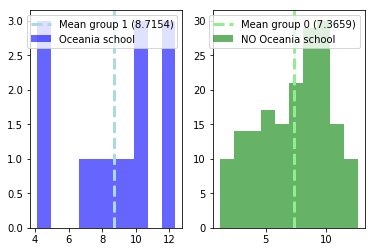

In [142]:
desafio_4(tmp_2_df, 'school', 'Oceania')

* Concluya con los principales resultados al respecto.

* `femlab`: La media de los continentes `Africa`, `Europe`, y `Oceania` es superior a la media del resto del mundo.

* `literact`: La media de `Africa` es inferior a la media del resto del mundo. Para el resto de continentes es superior.

* `school`: Para las regiones `Africa` y `Americas` su media es inferior con respecto a la media del mundo.  El resto de contiente presenta media superior.